# Demo

In [1]:
from esmtools.prediction import *
import matplotlib.pyplot as plt

# Load sample data
Subset of ensembles and members from MPI-ESM-LR (CMIP6 version) esmControl simulation of an early state. 

## 1d

In [2]:
#ds = load_dataset('PM_MPI-ESM-LR_ds')
#control = load_dataset('PM_MPI-ESM-LR_control')

In [2]:
ds = xr.open_dataset('/home/mpim/m300524/esmtools/sample_data/prediction/PM_MPI-ESM-LR_ds.nc')
control = xr.open_dataset('/home/mpim/m300524/esmtools/sample_data/prediction/PM_MPI-ESM-LR_control.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:   (area: 3, ensemble: 12, member: 10, period: 5, year: 20)
Coordinates:
  * year      (year) int64 1900 1901 1902 1903 1904 ... 1915 1916 1917 1918 1919
  * period    (period) object 'DJF' 'JJA' 'MAM' 'SON' 'ym'
  * area      (area) object 'global' 'North_Atlantic' 'North_Atlantic_SPG'
  * ensemble  (ensemble) int64 3014 3023 3045 3061 3124 ... 3178 3228 3237 3257
  * member    (member) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    tos       (period, year, area, ensemble, member) float32 ...
    sos       (period, year, area, ensemble, member) float32 ...
    AMO       (period, year, area, ensemble, member) float32 ...

In [4]:
control

<xarray.Dataset>
Dimensions:  (area: 3, period: 5, year: 300)
Coordinates:
  * year     (year) int64 1900 1901 1902 1903 1904 ... 2195 2196 2197 2198 2199
  * period   (period) object 'DJF' 'JJA' 'MAM' 'SON' 'ym'
  * area     (area) object 'global' 'North_Atlantic' 'North_Atlantic_SPG'
Data variables:
    tos      (period, year, area) float32 ...
    sos      (period, year, area) float32 ...
    AMO      (period, year, area) float32 ...

## 3d

In [6]:
#ds3d = load_dataset('PM_MPI-ESM-LR_ds3d')

In [7]:
#control3d = load_dataset('PM_MPI-ESM-LR_control3d')

In [5]:
ds3d = xr.open_dataset('/home/mpim/m300524/esmtools/sample_data/prediction/PM_MPI-ESM-LR_ds3d.nc')
control3d = xr.open_dataset('/home/mpim/m300524/esmtools/sample_data/prediction/PM_MPI-ESM-LR_control3d.nc')

In [6]:
control3d

<xarray.Dataset>
Dimensions:  (x: 256, y: 220, year: 50)
Coordinates:
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * year     (year) int64 1900 1901 1902 1903 1904 ... 1945 1946 1947 1948 1949
Dimensions without coordinates: x, y
Data variables:
    tos      (year, y, x) float32 ...
    sos      (year, y, x) float32 ...

In [7]:
ds3d

<xarray.Dataset>
Dimensions:   (ensemble: 4, member: 4, x: 256, y: 220, year: 5)
Coordinates:
    lon       (y, x) float64 ...
    lat       (y, x) float64 ...
  * year      (year) int64 1900 1901 1902 1903 1904
  * ensemble  (ensemble) int64 3014 3061 3175 3237
Dimensions without coordinates: member, x, y
Data variables:
    tos       (year, ensemble, member, y, x) float32 ...
    sos       (year, ensemble, member, y, x) float32 ...

# Predictability metrics

- available metrics: rmse, pearson_r, mse, PPP, uACC, ... see compute??

- available comparisons: m2m, m2e, m2c, e2c

In [8]:
rmse?

Signature: rmse(a, b, dim)
Docstring:
Root Mean Squared Error.

Parameters
----------
a : Dataset, DataArray, GroupBy, Variable, numpy/dask arrays or scalars
    Mix of labeled and/or unlabeled arrays to which to apply the function.
b : Dataset, DataArray, GroupBy, Variable, numpy/dask arrays or scalars
    Mix of labeled and/or unlabeled arrays to which to apply the function.
dim : str
    The dimension to apply the correlation along.

Returns
-------
Single value or tuple of Dataset, DataArray, Variable, dask.array.Array or
numpy.ndarray, the first type on that list to appear on an input.
    Root Mean Squared Error.

See Also
--------
sklearn.metrics.mean_squared_error
xarray.apply_unfunc
File:      /work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xskillscore-0.0.2-py3.6.egg/xskillscore/core/deterministic.py
Type:      function


In [9]:
m2e?

Signature: m2e(ds3d, supervector_dim)
Docstring: Create two supervectors to compare members to ensemble mean.
File:      /mnt/lustre01/pf/zmaw/m300524/esmtools/esmtools/prediction.py
Type:      function


## 1d

In [10]:
varname='tos'
area='North_Atlantic'
period='ym'
#metric=rmse
metric=pearson_r
comparison=m2e
sig=99
bootstrap=100

In [11]:
def get_limit_sig(metric=pearson_r,sig=sig):
    if metric.__name__ in ['pearson_r', 'PPP', 'PM_MSSS']:
        limit = 'upper'
        sigl = sig
    else:
        limit = 'lower'
        sigl = 100 - sig
    return limit, sigl

In [12]:
limit, sigl = get_limit_sig(metric=metric, sig=sig)

In [13]:
ds_ = ds.sel(area=area,period=period)[varname]
control_ = control.sel(area=area,period=period)[varname]

In [14]:
skill = compute(ds_, control_, metric=metric, comparison=comparison)
threshold =  PM_sig(ds_, control_, metric=metric, comparison=comparison, sig=sigl, bootstrap=bootstrap)

In [18]:
persistence = compute_persistence(ds_, control_, metric=metric, comparison=comparison)

In [16]:
ph = vectorized_predictability_horizon(skill, threshold, limit=limit).values

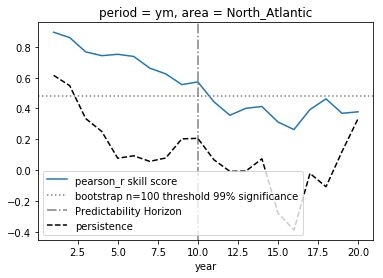

In [17]:
skill.plot(label=metric.__name__+' skill score')
plt.axhline(y=threshold, ls=':',c='gray',label='bootstrap n='+str(bootstrap)+' threshold '+str(sig)+'% significance')
plt.axvline(x=ph,ls='-.',c='gray',label='Predictability Horizon')
persistence.plot(ls='--',c='k',label='persistence')
plt.legend()

## many variables at once

In [20]:
skill_many = compute(ds, control, metric=metric, comparison=comparison)

### prediction skill varies with season

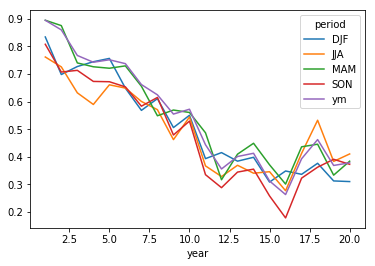

In [21]:
skill_many.sel(area=area).to_dataframe()[varname].unstack().T.plot()

### Predictability Horizon

In [22]:
threshold_many = PM_sig(ds, control, metric=metric, comparison=comparison, sig=sigl, bootstrap=bootstrap)

In [23]:
ph_many = vectorized_predictability_horizon(skill_many, threshold_many, limit=limit)

In [24]:
ph_many.to_dataframe().T.astype(int)

area     global                 North_Atlantic                  \
period      DJF JJA MAM SON  ym            DJF JJA MAM SON  ym   
quantile      0   0   0   0   0              0   0   0   0   0   
tos           4   4   5   4   5             10  10  11  10  11   
sos          16  18  18  19  18             10  10   9  10  10   
AMO           2   2   3   2   2              2   2   3   2   2   

area     North_Atlantic_SPG                  
period                  DJF JJA MAM SON  ym  
quantile                  0   0   0   0   0  
tos                      10   9  10   9  10  
sos                       9  10  10  10  10  
AMO                       2   2   3   2   2

# 3d

In [25]:
skill3d = compute(ds3d[varname], control3d[varname], metric=metric, comparison=comparison)

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [26]:
threshold3d = PM_sig(ds[varname], control3d[varname], metric=metric, comparison=comparison, sig=sigl, bootstrap=bootstrap)

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/

## Skill for Lead Year

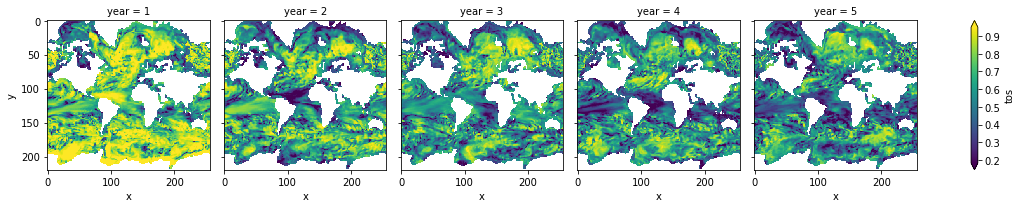

In [27]:
skill3d.plot(robust=True,yincrease=False, col='year')

## Predictability Horizon map

In [28]:
if limit == 'upper':
    masked = skill3d.where(skill3d > threshold3d)
elif limit == 'lower':
    masked = skill3d.where(skill3d < threshold3d)

In [29]:
ph3d = vectorized_predictability_horizon(masked, threshold3d, limit=limit)

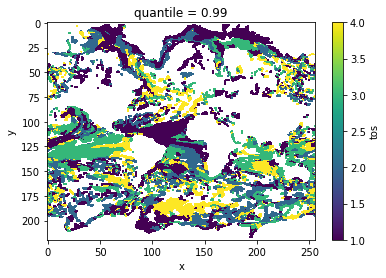

In [30]:
ph3d.where(ph3d>0).plot(yincrease=False)

# misc variability

## DPP

In [31]:
et.prediction.DPP?

Signature: et.prediction.DPP(ds, m=10, chunk=True, var_all_e=False, time_dim='year')
Docstring:
Calculate Diagnostic Potential Predictability (DPP) as potentially predictable variance fraction (ppvf) in Boer 2004.

Note: Different way of calculating it than in Seferian 2018 or Resplandy 2015,
but quite similar results.

References
----------
- Boer, G. J. “Long Time-Scale Potential Predictability in an Ensemble of
    Coupled Climate Models.” Climate Dynamics 23, no. 1 (August 1, 2004):
    29–44. https://doi.org/10/csjjbh.
- Resplandy, L., R. Séférian, and L. Bopp. “Natural Variability of CO2 and
    O2 Fluxes: What Can We Learn from Centuries-Long Climate Models
    Simulations?” Journal of Geophysical Research: Oceans 120, no. 1
    (January 2015): 384–404. https://doi.org/10/f63c3h.
- Séférian, Roland, Sarah Berthet, and Matthieu Chevallier. “Assessing the
    Decadal Predictability of Land and Ocean Carbon Uptake.” Geophysical
    Research Letters, March 15, 2018. https://doi.org/

/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


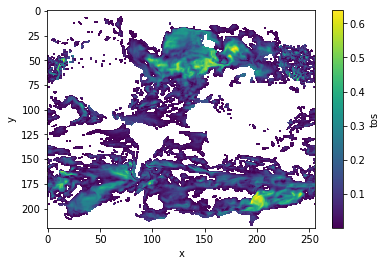

In [32]:
DPP = et.prediction.DPP(control3d[varname], m=10)
DPP.where(DPP>0).plot(yincrease=False)

## varweigthed mean period

In [33]:
et.stats.vec_varweighted_mean_period?

Signature: et.stats.vec_varweighted_mean_period(ds)
Docstring:
Calculate the variance weighted mean period of an xr.DataArray.

Reference
---------
- Branstator, Grant, and Haiyan Teng. “Two Limits of Initial-Value Decadal
  Predictability in a CGCM.” Journal of Climate 23, no. 23 (August 27, 2010):
  6292–6311. https://doi.org/10/bwq92h.
File:      /mnt/lustre01/pf/zmaw/m300524/esmtools/esmtools/stats.py
Type:      function


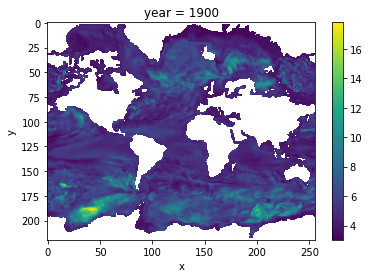

In [34]:
varweighted_mean_period = et.stats.vec_varweighted_mean_period(control3d[varname])
varweighted_mean_period.plot(yincrease=False)

## decorr time

In [35]:
et.stats.vec_tau_d?

Signature: et.stats.vec_tau_d(da, r=20, dim='year')
Docstring:
Calculate decorrelation time of an xr.DataArray.

tau_d = 1 + 2 * sum_{k=1}^(infinity)(alpha_k)

Reference
---------
- Storch, H. v, and Francis W. Zwiers. Statistical Analysis in Climate
Research. Cambridge ; New York: Cambridge University Press, 1999., p.373
File:      /mnt/lustre01/pf/zmaw/m300524/esmtools/esmtools/stats.py
Type:      function


/work/mh0727/m300524/anaconda3/envs/my_jupyter/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


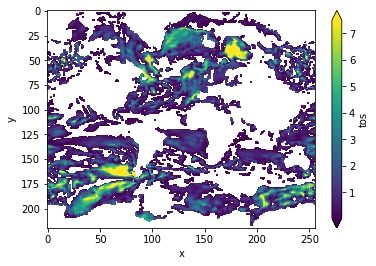

In [36]:
decorr_time = et.stats.vec_tau_d(control3d[varname])
decorr_time.where(decorr_time>0).plot(yincrease=False, robust=True)